In [1]:
import os
from xml.etree import ElementTree

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
dataset_path = '/kaggle/input/car-crashes-severity-prediction/'

df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))

print("The shape of the dataset is {}.\n\n".format(df.shape))

df.head()

The shape of the dataset is (6407, 16).




,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
0,0,37.762150,-122.405660,False,0.044,False,False,False,False,False,False,False,True,R,2,2016-03-25 15:13:02
1,1,37.719157,-122.448254,False,0.000,False,False,False,False,False,False,False,False,R,2,2020-05-05 19:23:00
2,2,37.808498,-122.366852,False,0.000,False,False,False,False,False,False,True,False,R,3,2016-09-16 19:57:16
3,3,37.785930,-122.391080,False,0.009,False,False,True,False,False,False,False,False,R,1,2020-03-29 19:48:43
4,4,37.719141,-122.448457,False,0.000,False,False,False,False,False,False,False,False,R,2,2019-10-09 08:47:00


In [3]:
weather_df = pd.read_csv(os.path.join(dataset_path, 'weather-sfcsv.csv'))
print("The shape of the dataset is {}.\n\n".format(weather_df.shape))

weather_df.head()

The shape of the dataset is (6901, 12).




,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,2020,27,7,18,Fair,64.0,0.0,64.0,70.0,20.0,10.0,No
1,2017,30,9,17,Partly Cloudy,NaN,NaN,71.1,57.0,9.2,10.0,No
2,2017,27,6,5,Overcast,NaN,NaN,57.9,87.0,15.0,9.0,No
3,2016,7,9,9,Clear,NaN,NaN,66.9,73.0,4.6,10.0,No
4,2019,19,10,2,Fair,52.0,0.0,52.0,89.0,0.0,9.0,No


In [4]:
tree = ElementTree.parse(os.path.join(dataset_path, 'holidays.xml'))
root = tree.getroot()

holidays = []
for row in root:
    try:
        holidays.append(row[0].text)
    except Exception as ex:
        pass
len(holidays)

90

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6407 entries, 0 to 6406
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6407 non-null   int64  
 1   Lat           6407 non-null   float64
 2   Lng           6407 non-null   float64
 3   Bump          6407 non-null   bool   
 4   Distance(mi)  6407 non-null   float64
 5   Crossing      6407 non-null   bool   
 6   Give_Way      6407 non-null   bool   
 7   Junction      6407 non-null   bool   
 8   No_Exit       6407 non-null   bool   
 9   Railway       6407 non-null   bool   
 10  Roundabout    6407 non-null   bool   
 11  Stop          6407 non-null   bool   
 12  Amenity       6407 non-null   bool   
 13  Side          6407 non-null   object 
 14  Severity      6407 non-null   int64  
 15  timestamp     6407 non-null   object 
dtypes: bool(9), float64(3), int64(2), object(2)
memory usage: 406.8+ KB


In [6]:
df.drop(columns='ID').describe()

,Lat,Lng,Distance(mi),Severity
count,6407.000000,6407.000000,6407.000000,6407.000000
mean,37.765653,-122.405990,0.135189,2.293429
std,0.032555,0.028275,0.396360,0.521225
min,37.609619,-122.510440,0.000000,1.000000
25%,37.737096,-122.412210,0.000000,2.000000
50%,37.768238,-122.404835,0.000000,2.000000
75%,37.787813,-122.392477,0.041000,3.000000
max,37.825626,-122.349734,6.820000,4.000000


In [7]:
for c in df.columns:
    if df[c].dtype in ['object', 'bool']:
        print(df[c].value_counts(), '\n')

False    6407
Name: Bump, dtype: int64 

False    5879
True      528
Name: Crossing, dtype: int64 

False    6404
True        3
Name: Give_Way, dtype: int64 

False    4828
True     1579
Name: Junction, dtype: int64 

False    6406
True        1
Name: No_Exit, dtype: int64 

False    6237
True      170
Name: Railway, dtype: int64 

False    6407
Name: Roundabout, dtype: int64 

False    5781
True      626
Name: Stop, dtype: int64 

False    6169
True      238
Name: Amenity, dtype: int64 

R    6082
L     325
Name: Side, dtype: int64 

2017-12-01 14:48:24    5
2020-12-07 17:04:30    5
2018-01-06 09:44:27    4
2020-11-30 19:02:00    4
2020-11-24 20:08:00    4
                      ..
2018-06-02 06:52:16    1
2020-12-25 23:57:32    1
2016-12-18 21:05:53    1
2017-02-10 16:13:33    1
2018-08-19 23:52:21    1
Name: timestamp, Length: 6248, dtype: int64 



In [8]:
df['Severity'].value_counts()

2    4346
3    1855
1     129
4      77
Name: Severity, dtype: int64

In [9]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6901 non-null   int64  
 1   Day                6901 non-null   int64  
 2   Month              6901 non-null   int64  
 3   Hour               6901 non-null   int64  
 4   Weather_Condition  6900 non-null   object 
 5   Wind_Chill(F)      3292 non-null   float64
 6   Precipitation(in)  3574 non-null   float64
 7   Temperature(F)     6899 non-null   float64
 8   Humidity(%)        6899 non-null   float64
 9   Wind_Speed(mph)    6556 non-null   float64
 10  Visibility(mi)     6900 non-null   float64
 11  Selected           6901 non-null   object 
dtypes: float64(6), int64(4), object(2)
memory usage: 647.1+ KB


In [10]:
weather_df.describe()

,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi)
count,6901.000000,6901.000000,6901.000000,6901.000000,3292.000000,3574.000000,6899.000000,6899.000000,6556.000000,6900.000000
mean,2018.293001,15.624837,6.775250,12.789886,59.762515,0.006444,59.905465,68.570952,10.813164,9.441851
std,1.390524,8.703753,3.567982,5.874155,9.338456,0.028822,7.977860,16.180126,6.406376,1.640513
min,2016.000000,1.000000,1.000000,0.000000,31.100000,0.000000,36.000000,10.000000,0.000000,0.000000
25%,2017.000000,8.000000,4.000000,8.000000,54.000000,0.000000,54.000000,59.000000,5.800000,10.000000
50%,2019.000000,15.000000,7.000000,14.000000,59.000000,0.000000,59.000000,70.000000,10.000000,10.000000
75%,2020.000000,23.000000,10.000000,17.000000,66.000000,0.000000,64.900000,80.000000,15.000000,10.000000
max,2020.000000,31.000000,12.000000,23.000000,98.000000,0.490000,98.100000,100.000000,40.300000,10.000000


In [11]:
for c in weather_df.columns:
    if weather_df[c].dtype in ['object', 'bool']:
        print(weather_df[c].value_counts(), '\n')

Partly Cloudy                   1580
Mostly Cloudy                   1445
Fair                            1279
Overcast                         566
Clear                            444
Cloudy                           396
Scattered Clouds                 389
Light Rain                       287
Fair / Windy                     127
Haze                              76
Rain                              66
Partly Cloudy / Windy             52
Mostly Cloudy / Windy             50
Heavy Rain                        31
Fog                               26
Shallow Fog                       23
Smoke                             20
Cloudy / Windy                    15
Light Rain / Windy                 8
Light Drizzle                      6
Mist                               5
Rain / Windy                       3
Patches of Fog                     3
Light Thunderstorms and Rain       1
Fog / Windy                        1
Squalls                            1
Name: Weather_Condition, dtype: int64 

In [12]:
counts = weather_df['Weather_Condition'].value_counts()
mask = weather_df['Weather_Condition'].isin(counts[counts < 20].index)
weather_df['Weather_Condition'][mask] = 'Other'
print(weather_df.value_counts('Weather_Condition'))

Weather_Condition
Partly Cloudy            1580
Mostly Cloudy            1445
Fair                     1279
Overcast                  566
Clear                     444
Cloudy                    396
Scattered Clouds          389
Light Rain                287
Fair / Windy              127
Haze                       76
Rain                       66
Partly Cloudy / Windy      52
Mostly Cloudy / Windy      50
Other                      43
Heavy Rain                 31
Fog                        26
Shallow Fog                23
Smoke                      20
dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


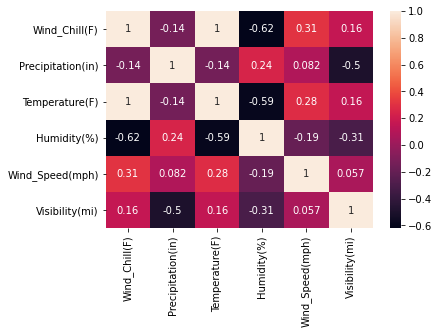

In [13]:
X = weather_df[['Wind_Chill(F)', 'Precipitation(in)', 'Temperature(F)', 'Humidity(%)', 'Wind_Speed(mph)', 'Visibility(mi)']]
sns.heatmap(X.corr(), annot = True)
plt.show()

In [14]:
weather_df = weather_df.drop(columns=['Selected', 'Wind_Chill(F)', 'Precipitation(in)'])

# Merge & Data Manipulation

In [15]:
weather_df = weather_df.fillna(weather_df.mean())
weather_df = weather_df.fillna(weather_df.mode().iloc[0])
weather_df = weather_df.drop_duplicates(['Year','Month', 'Day', 'Hour'])

In [16]:
duplicateDFRow = df[df.duplicated()]
df.drop(duplicateDFRow.index)
print(len(duplicateDFRow))

0


In [17]:
def merge_weather(df):
    merge_list = ['Year','Month', 'Day', 'Hour']
    new_df = df.merge(weather_df,  how='left', on=merge_list)
    return new_df

In [18]:
def add_is_holiday(df):
    df['holiday'] = df['timestamp'].dt.date.isin(holidays)
    return df

In [19]:
def add_time_cols(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['Hour'] = df['timestamp'].apply(lambda x : x.hour)
    df['Day'] = df['timestamp'].apply(lambda x : x.day)
    df['DayOfWeek'] = df['timestamp'].apply(lambda x : x.dayofweek)
    df['Month'] = df['timestamp'].apply(lambda x : x.month)
    df['Year'] = df['timestamp'].apply(lambda x : x.year)
    return df

# EDA

In [20]:
df_class_1 = df[df['Severity'] == 1]
df_class_2 = df[df['Severity'] == 2]
df_class_3 = df[df['Severity'] == 3]
df_class_4 = df[df['Severity'] == 4]
df_class_1_under = df_class_1.sample(len(df_class_4))
df_class_2_under = df_class_2.sample(len(df_class_4))
df_class_3_under = df_class_3.sample(len(df_class_4))
df_balanced_under = pd.concat([df_class_1_under, df_class_2_under, df_class_3_under, df_class_4])
df_balanced_under['Severity'].value_counts()

1    77
2    77
3    77
4    77
Name: Severity, dtype: int64

In [21]:
X = add_time_cols(df_balanced_under)
X = merge_weather(X)
X.columns

Index(['ID', 'Lat', 'Lng', 'Bump', 'Distance(mi)', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Stop', 'Amenity',
       'Side', 'Severity', 'timestamp', 'Hour', 'Day', 'DayOfWeek', 'Month',
       'Year', 'Weather_Condition', 'Temperature(F)', 'Humidity(%)',
       'Wind_Speed(mph)', 'Visibility(mi)'],
      dtype='object')

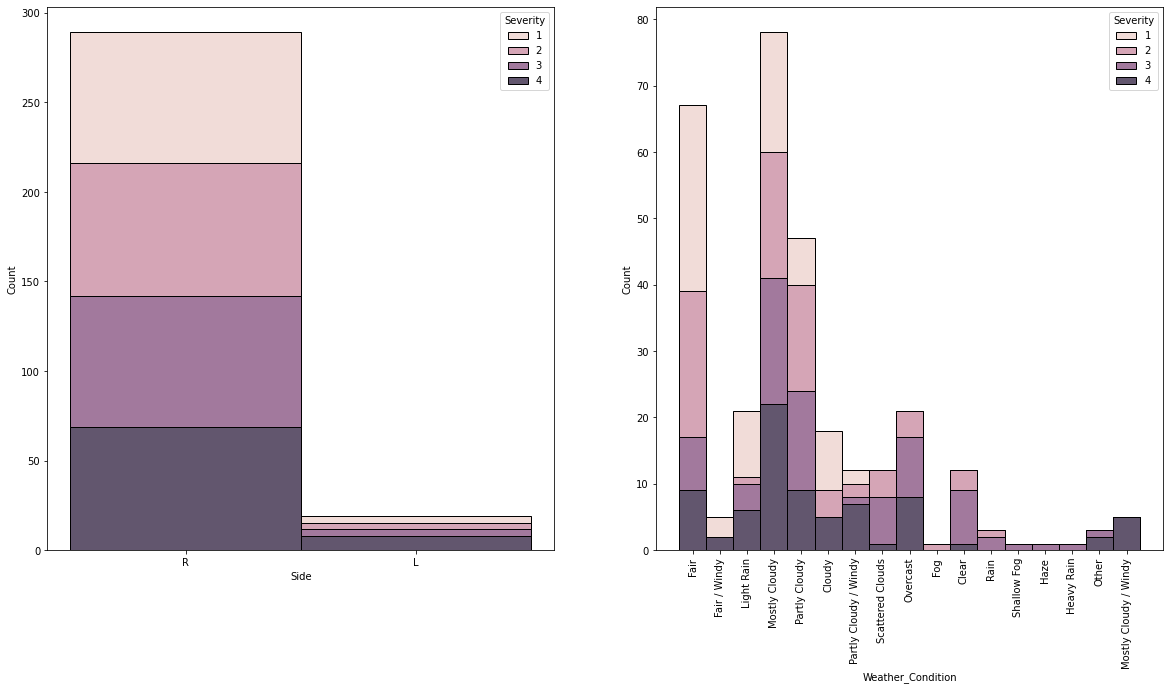

In [22]:
object_col = [c for c in X.columns if X[c].dtype == 'object']
fig, ax = plt.subplots(1,len(object_col), figsize = (20,10))
for i, c in enumerate(object_col):
    sns.histplot(binwidth=0.5, x=c, hue="Severity", data=X, stat="count", multiple="stack", ax=ax[i])
plt.xticks(rotation=90)
plt.show()

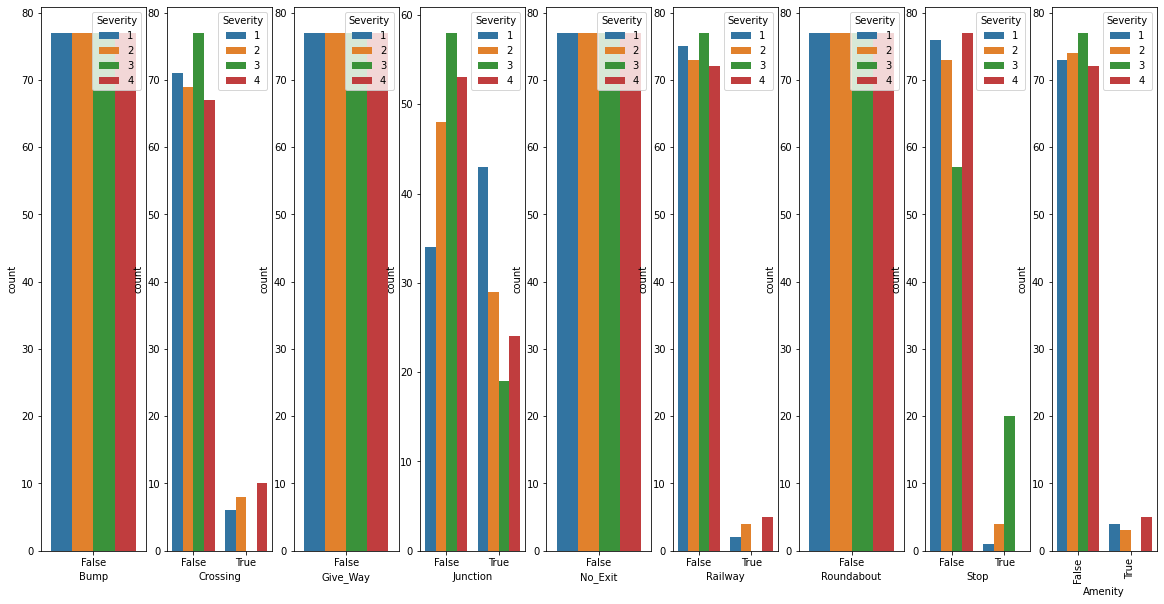

In [23]:
bool_col = [c for c in X.columns if X[c].dtype == 'bool']
fig, ax = plt.subplots(1, len(bool_col), figsize = (20,10))
for i, c in enumerate(bool_col):
    sns.countplot(x=c, hue="Severity", data=X,ax=ax[i])
plt.xticks(rotation=90)
plt.show()

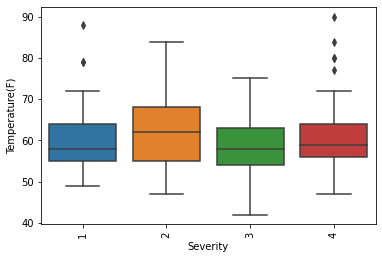

In [24]:
sns.boxplot(x="Severity", y="Temperature(F)", data=X) #,ax=ax[i])
plt.xticks(rotation=90)
plt.show()

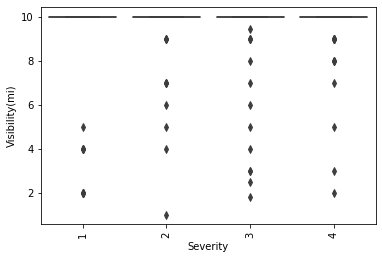

In [25]:
sns.boxplot(x="Severity", y='Visibility(mi)', data=X)
plt.xticks(rotation=90)
plt.show()

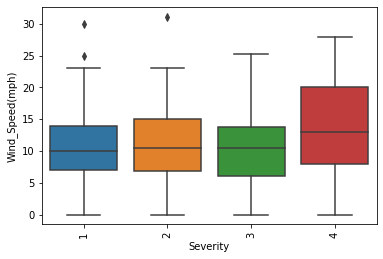

In [26]:
sns.boxplot(x="Severity", y='Wind_Speed(mph)', data=X) #,ax=ax[i])
plt.xticks(rotation=90)
plt.show()

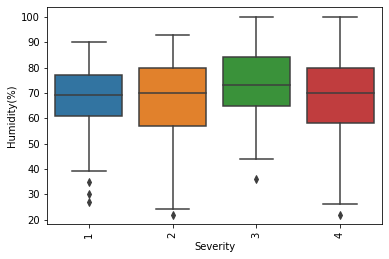

In [27]:
sns.boxplot(x="Severity", y='Humidity(%)', data=X)
plt.xticks(rotation=90)
plt.show()

# Pipline

In [28]:
encoder = OneHotEncoder(handle_unknown='ignore')

def encode(df, is_train=False):
    object_cols = [c for c in df.columns if df[c].dtype == 'object']
    if is_train:
        encoder.fit(df[object_cols])
    X = pd.DataFrame(encoder.transform(df[object_cols]).toarray(), columns=encoder.get_feature_names(object_cols))
    df = df.drop(columns=object_cols)
    df = pd.concat([df, X], axis=1)
    return df

def pipline(df, my_list, is_train=False):
    df = add_time_cols(df)
    df = merge_weather(df)
    df = add_is_holiday(df)
    df = df[my_list]
    df = encode(df, is_train)
    return df

In [29]:
X.columns

Index(['ID', 'Lat', 'Lng', 'Bump', 'Distance(mi)', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Stop', 'Amenity',
       'Side', 'Severity', 'timestamp', 'Hour', 'Day', 'DayOfWeek', 'Month',
       'Year', 'Weather_Condition', 'Temperature(F)', 'Humidity(%)',
       'Wind_Speed(mph)', 'Visibility(mi)'],
      dtype='object')

# Model Selection

In [30]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, shuffle =True, random_state=42, stratify=df['Severity'])

X_train = train_df.drop(columns=['ID', 'Severity'])
y_train = train_df['Severity']

X_val = val_df.drop(columns=['ID', 'Severity'])
y_val = val_df['Severity']


# Model Traning

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

In [32]:
from itertools import combinations
from copy import deepcopy

cols = ['Crossing', 'Stop', 'Month', 'Year', 'Hour' ,'Humidity(%)', 'Wind_Speed(mph)']

max_score = 0
best_features = []
best_classifier = None
x = 1
for i in range(len(cols) + 1):
    for j in combinations(cols, i):
        
        my_list = ['Lat', 'Lng', 'Distance(mi)']
        my_list += list(j)
        
        X_train_curr = pipline(X_train, my_list, True)
        X_val_curr = pipline(X_val, my_list)
        
        # Train the classifier
        classifier.fit(X_train_curr, y_train)
        
        score = classifier.score(X_val_curr, y_val)
        
        if max_score < score:
            max_score = score
            best_features = my_list
            best_classifier = deepcopy(classifier)

print("The best accuracy of the classifier on the validation set is ", max_score)
print("Features List ", best_features)

The best accuracy of the classifier on the validation set is  0.7480499219968799
Features List  ['Lat', 'Lng', 'Distance(mi)', 'Year', 'Hour', 'Wind_Speed(mph)']


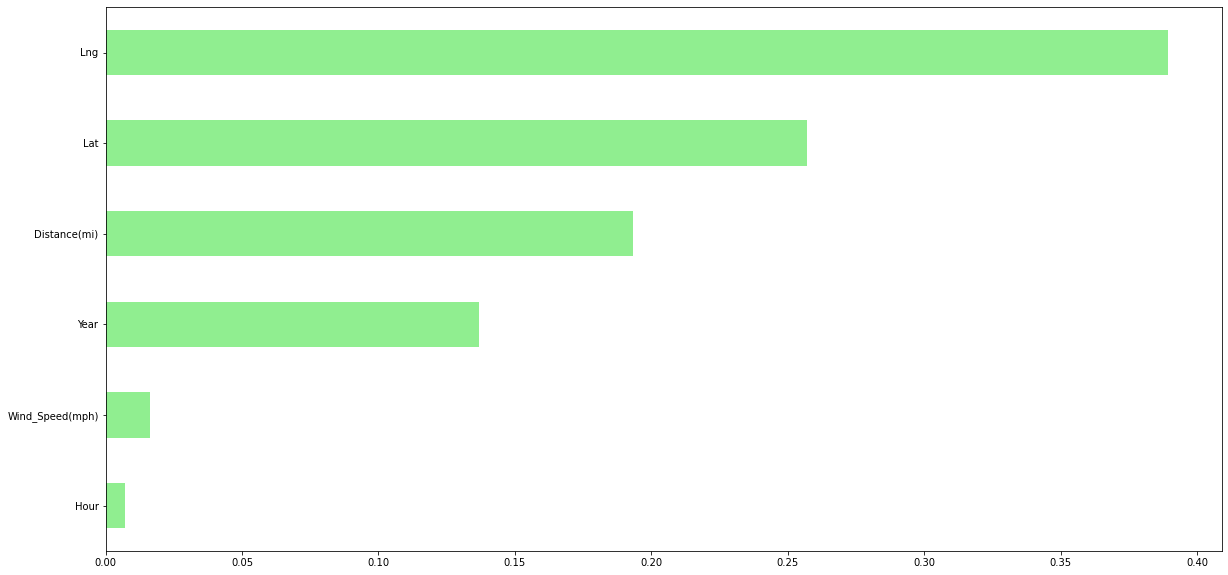

In [33]:
plt.figure(figsize = (20,10))
importances_rf = pd.Series(best_classifier.feature_importances_, index = pipline(X_train, best_features, encoder).columns) 
sorted_importances_rf = importances_rf.sort_values() 
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.show()

# Submission File Generation

In [34]:
test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
test_df.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp
0,6407,37.786060,-122.390900,False,0.039,False,False,True,False,False,False,False,False,R,2016-04-04 19:20:31
1,6408,37.769609,-122.415057,False,0.202,False,False,False,False,False,False,False,False,R,2020-10-28 11:51:00
2,6409,37.807495,-122.476021,False,0.000,False,False,False,False,False,False,False,False,R,2019-09-09 07:36:45
3,6410,37.761818,-122.405869,False,0.000,False,False,True,False,False,False,False,False,R,2019-08-06 15:46:25
4,6411,37.732350,-122.414100,False,0.670,False,False,False,False,False,False,False,False,R,2018-10-17 09:54:58


In [35]:
X_test = test_df.drop(columns=['ID'])

X_test = pipline(X_test, best_features)

y_test_predicted = best_classifier.predict(X_test)

test_df['Severity'] = y_test_predicted

test_df.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp,Severity
0,6407,37.786060,-122.390900,False,0.039,False,False,True,False,False,False,False,False,R,2016-04-04 19:20:31,2
1,6408,37.769609,-122.415057,False,0.202,False,False,False,False,False,False,False,False,R,2020-10-28 11:51:00,2
2,6409,37.807495,-122.476021,False,0.000,False,False,False,False,False,False,False,False,R,2019-09-09 07:36:45,2
3,6410,37.761818,-122.405869,False,0.000,False,False,True,False,False,False,False,False,R,2019-08-06 15:46:25,2
4,6411,37.732350,-122.414100,False,0.670,False,False,False,False,False,False,False,False,R,2018-10-17 09:54:58,2


In [36]:
test_df[['ID', 'Severity']].to_csv('/kaggle/working/submission.csv', index=False)